In [13]:
#Import Libraries
import pandas as pd
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
!pip install xgboost
from xgboost import XGBRegressor

In [14]:
#Reading data

dataset = pd.read_csv(r"C:\Users\ec\Desktop\Global\perso\Machine Learning_IA\Project\Dataset\home-data-for-ml-course\train.csv",index_col = 'Id')
test = pd.read_csv(r"C:\Users\ec\Desktop\Global\perso\Machine Learning_IA\Project\Dataset\home-data-for-ml-course\test.csv",index_col = 'Id')

dataset_copy = dataset.copy()

print(dataset.shape)
dataset.head()

(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [15]:
print(dataset.describe().T)
print(dataset.columns)
#Les données vont de 2006 à 2010 ( prix de l'année de vente ) 

                count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712  

In [16]:
#
# Separate the categorical from numerical variables
#

num_vars = dataset.select_dtypes(include=["float64","int64"]).columns.tolist()

cat_vars = dataset.select_dtypes(include=["object"]).columns.tolist()

print("Variables numériques :", num_vars)
print("Variables catégoriques :", cat_vars)


Variables numériques : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Variables catégoriques : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepla

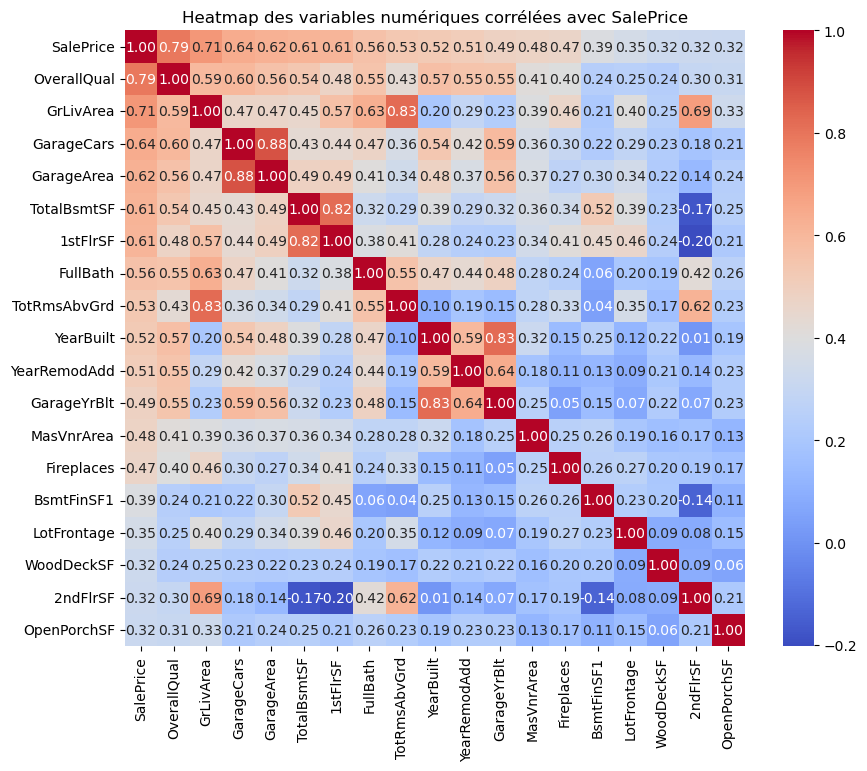

In [17]:
# Calculer les corrélations avec la cible
corr_target = dataset[num_vars].corr()['SalePrice'].sort_values(ascending=False)

# Garder les corrélations significatives uniquement (valeur absolue > 0.3 par exemple)
important_corr = corr_target[abs(corr_target) > 0.3]

# Afficher la heatmap pour ces variables seulement
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[important_corr.index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des variables numériques corrélées avec SalePrice")
plt.show()

In [18]:
dataset_numerical_features = [ "OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt",
                    "YearRemodAdd","GarageYrBlt","MasVnrArea","Fireplaces","BsmtFinSF1","LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF"]


In [19]:
# Créer un tableau des types
types_summary = pd.DataFrame({
    'Nom de la variable': dataset.columns,
    'Type': dataset.dtypes.astype(str),
    'Nombre de valeurs uniques': dataset.nunique()
}).sort_values(by='Type')

print(types_summary)

             Nom de la variable     Type  Nombre de valeurs uniques
LotFrontage         LotFrontage  float64                        110
MasVnrArea           MasVnrArea  float64                        327
GarageYrBlt         GarageYrBlt  float64                         97
MSSubClass           MSSubClass    int64                         15
BsmtUnfSF             BsmtUnfSF    int64                        780
...                         ...      ...                        ...
HouseStyle           HouseStyle   object                          8
Functional           Functional   object                          7
BsmtExposure       BsmtExposure   object                          4
GarageType           GarageType   object                          6
HeatingQC             HeatingQC   object                          5

[80 rows x 3 columns]


In [20]:
dataset.nunique().sort_values(ascending = False).head(10) 
#
#Combien et quel données sont en plus grand nombre
#

LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
MasVnrArea      327
dtype: int64

In [21]:
# Tableau de toutes les corrélations par paires, fondu à plat
corr_matrix = dataset[num_vars].corr().abs().unstack().sort_values(ascending=False)

# Supprimer les doublons (corrélation d'une variable avec elle-même)
corr_matrix = corr_matrix[corr_matrix < 1]

print(corr_matrix.head(10))  # top 10 des corrélations absolues entre variables

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
YearBuilt     GarageYrBlt     0.825667
GarageYrBlt   YearBuilt       0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
dtype: float64


C:\Users\ec\AppData\Local\Temp\ipykernel_38180\2740019290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="vlag")


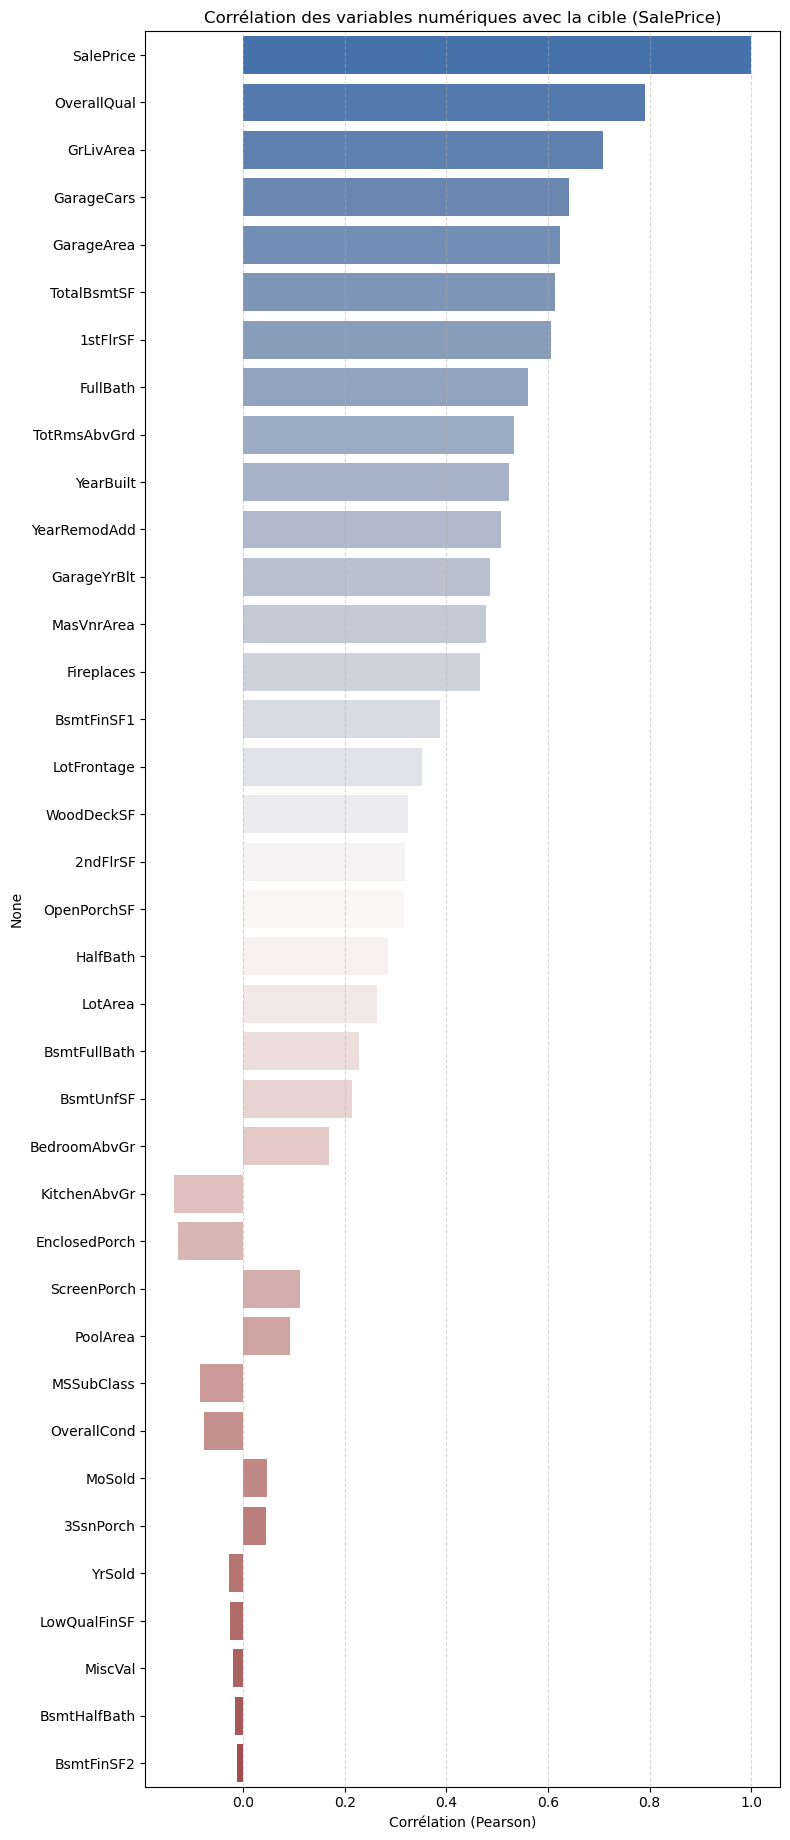


Résumé des variables :


Variable     Type  N_unique  Missing (%)
LotFrontage    LotFrontage  float64       110         18.0
MasVnrArea      MasVnrArea  float64       327          1.0
GarageYrBlt    GarageYrBlt  float64        97          6.0
MSSubClass      MSSubClass    int64        15          0.0
BsmtUnfSF        BsmtUnfSF    int64       780          0.0
...                    ...      ...       ...          ...
HouseStyle      HouseStyle   object         8          0.0
Functional      Functional   object         7          0.0
BsmtExposure  BsmtExposure   object         4          3.0
GarageType      GarageType   object         6          6.0
HeatingQC        HeatingQC   object         5          0.0

[80 rows x 4 columns]

In [22]:
# === Calcul des corrélations avec la cible
correlations = dataset[num_vars].corrwith(dataset['SalePrice']).sort_values(key=abs, ascending=False)

# === Affichage propre des corrélations les plus intéressantes
plt.figure(figsize=(8, len(correlations)/2))
sns.barplot(x=correlations.values, y=correlations.index, palette="vlag")
plt.title(f'Corrélation des variables numériques avec la cible ({'SalePrice'})')
plt.xlabel("Corrélation (Pearson)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Affichage résumé : types + unicité
summary = pd.DataFrame({
    'Variable': dataset.columns,
    'Type': dataset.dtypes.astype(str),
    'N_unique': dataset.nunique(),
    'Missing (%)': dataset.isnull().mean().round(2) * 100
}).sort_values(by='Type')

print("\nRésumé des variables :")
display(summary)

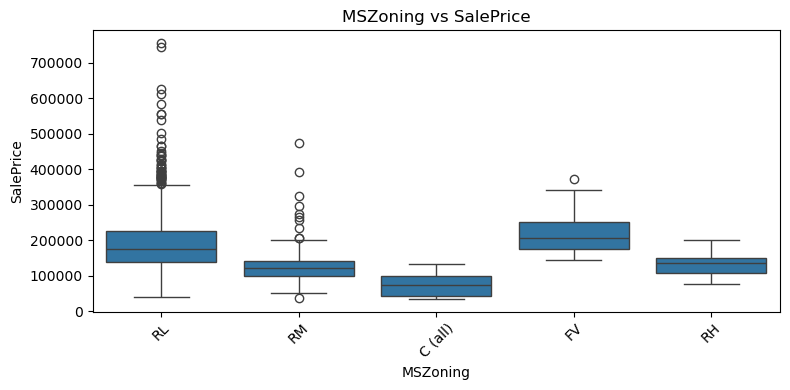

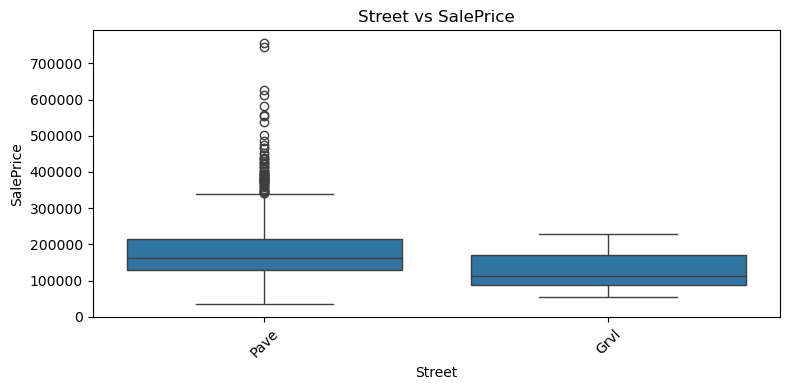

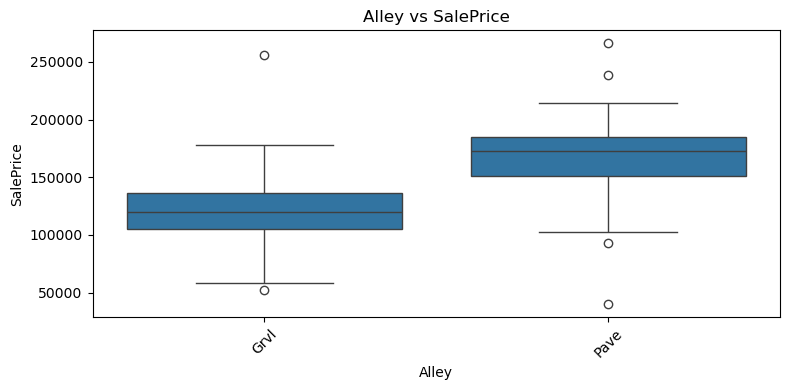

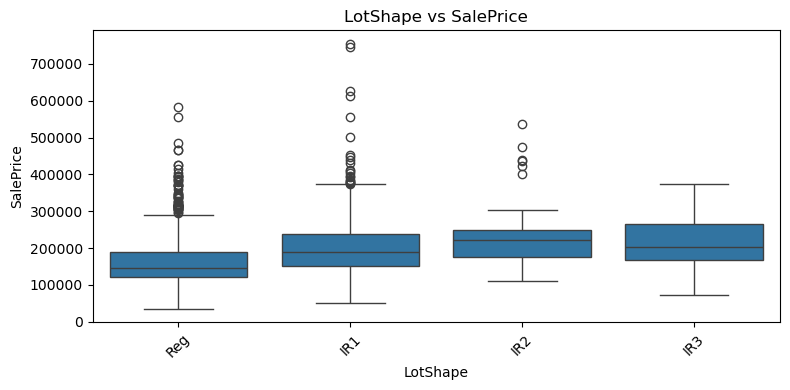

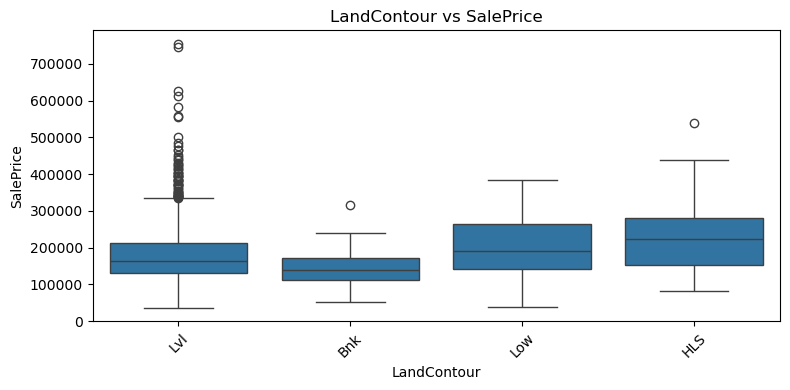

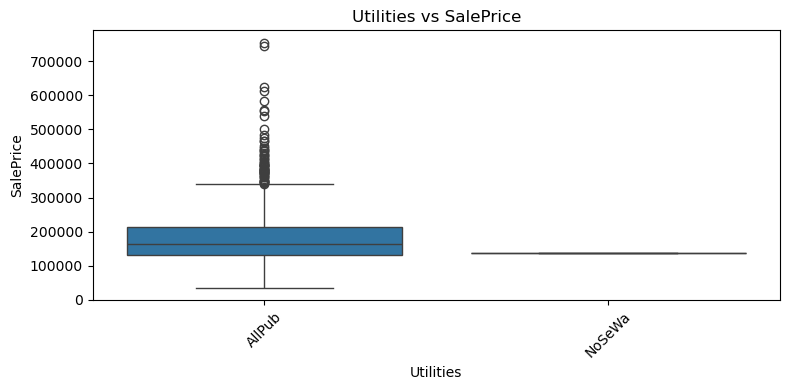

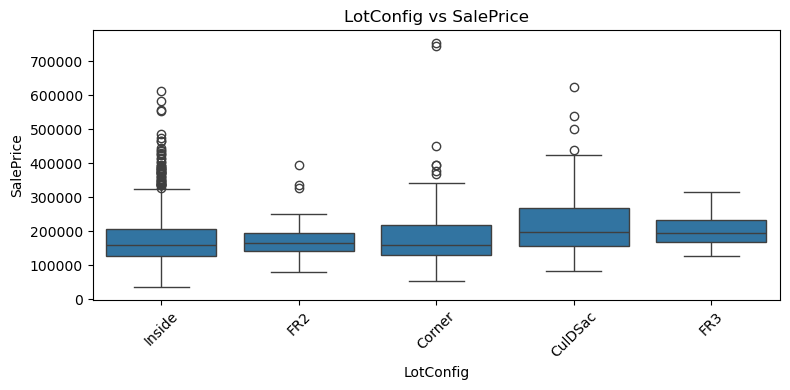

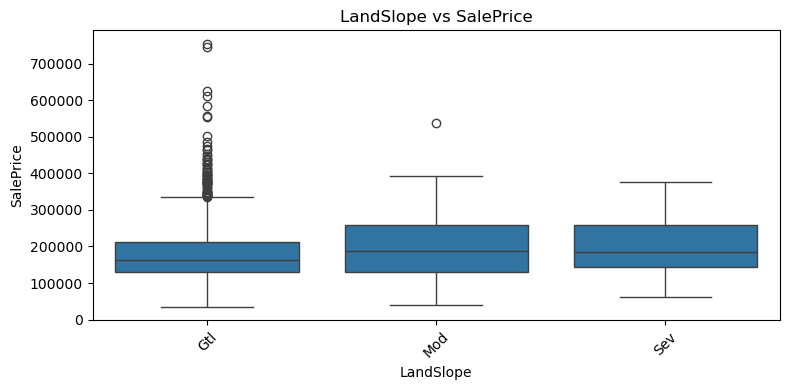

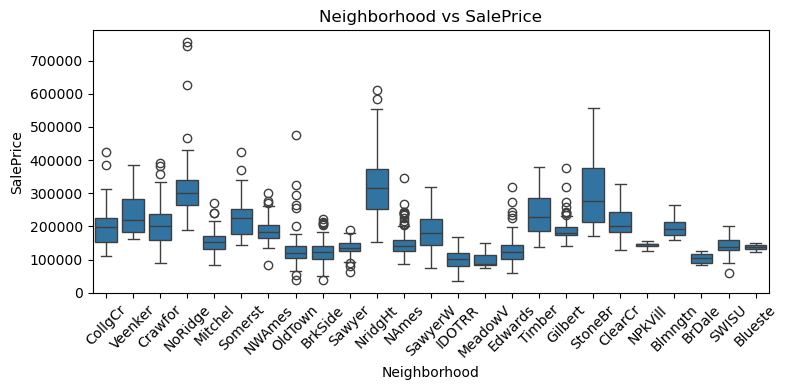

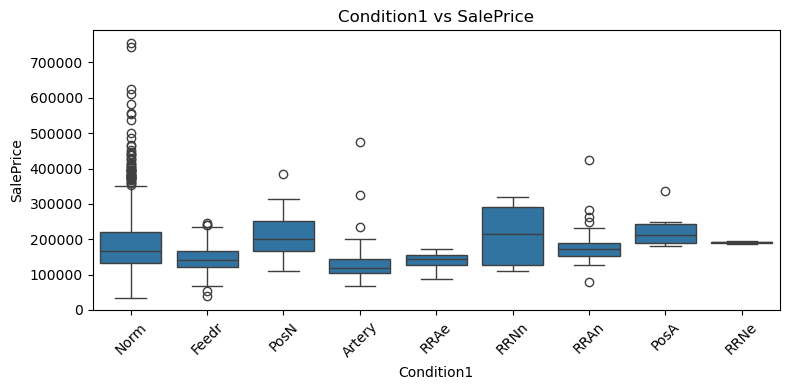

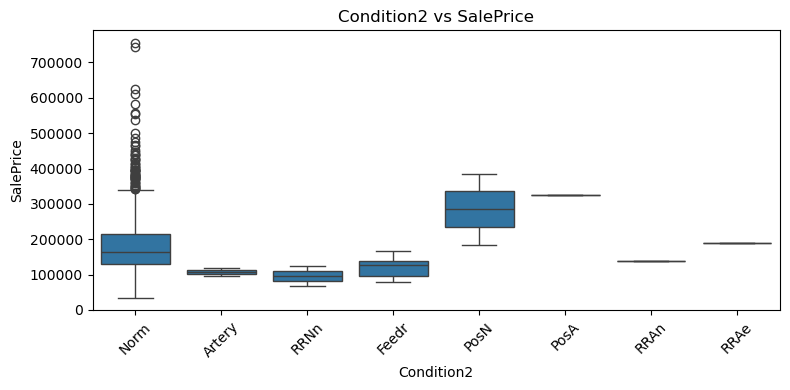

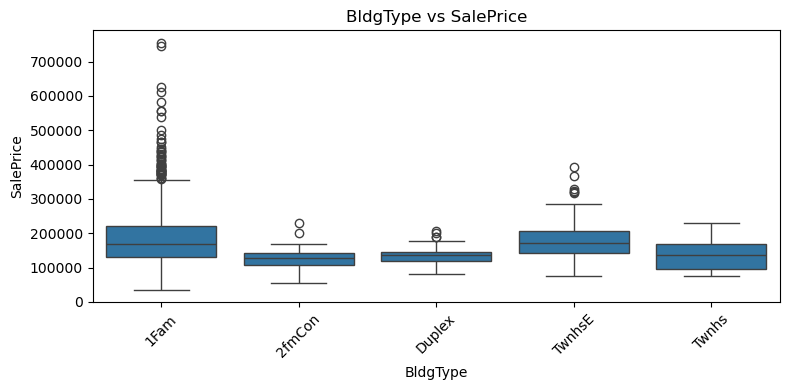

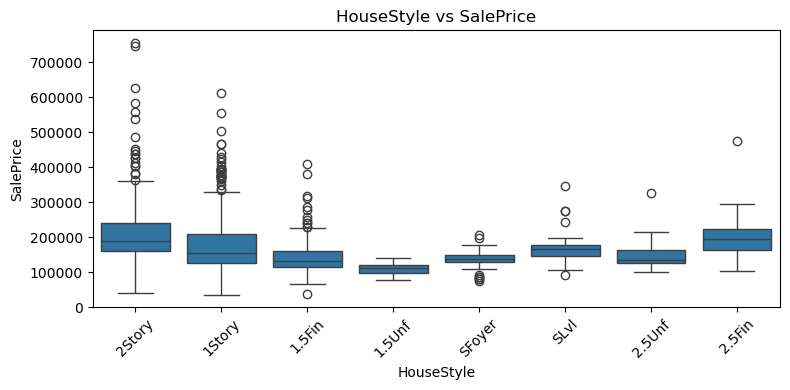

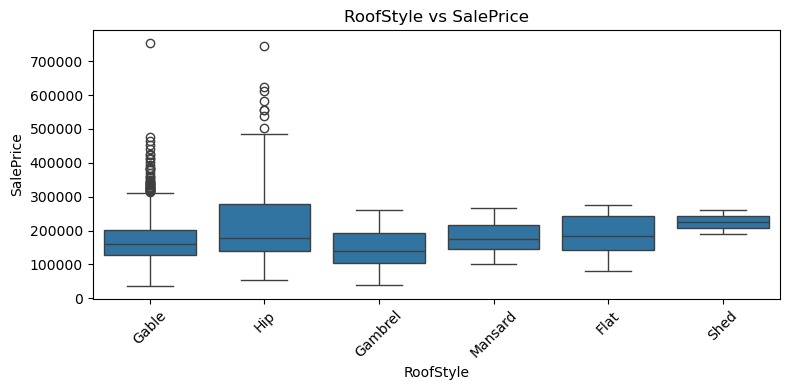

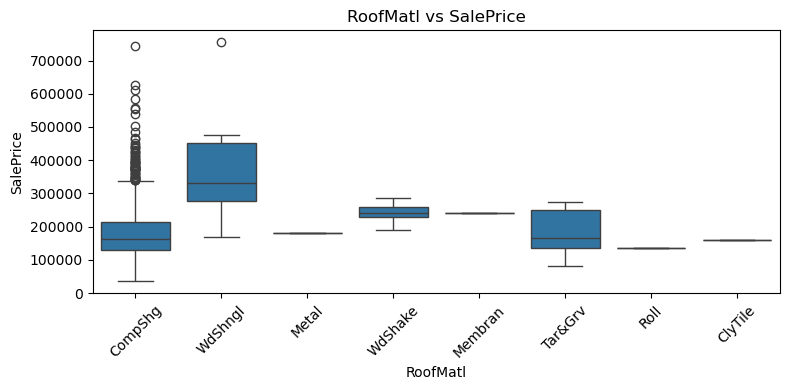

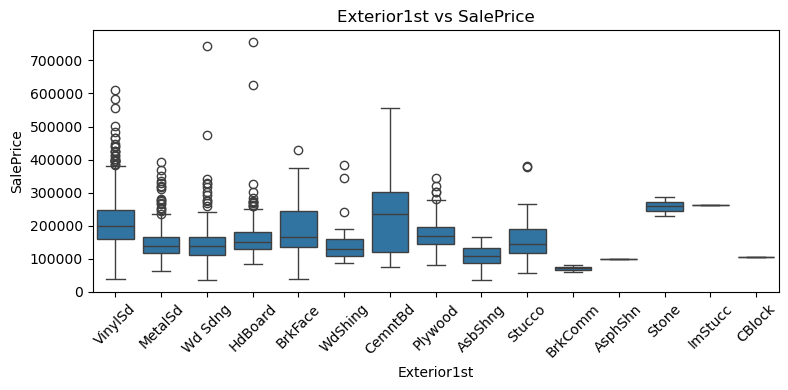

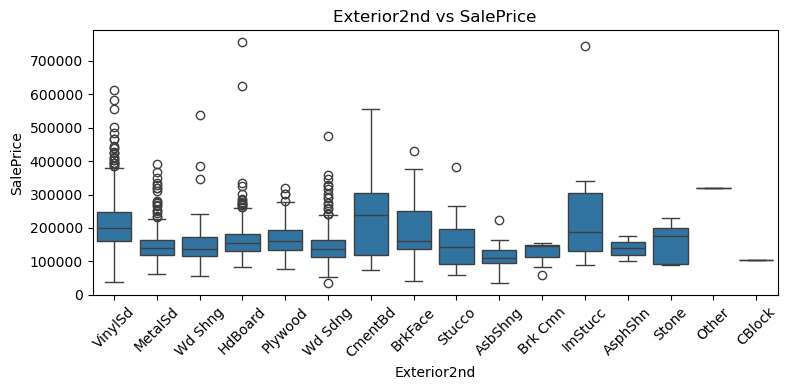

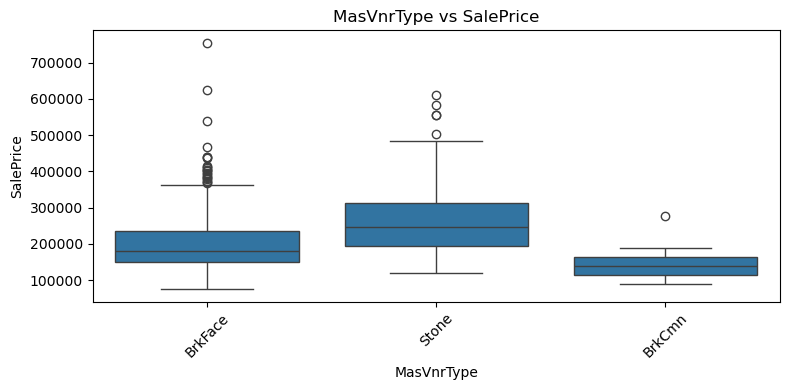

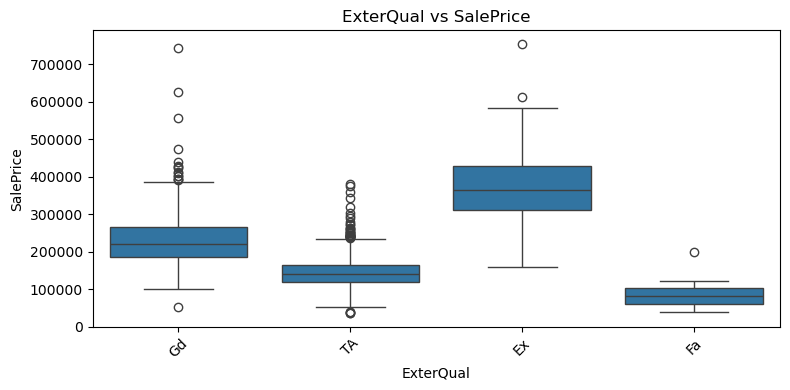

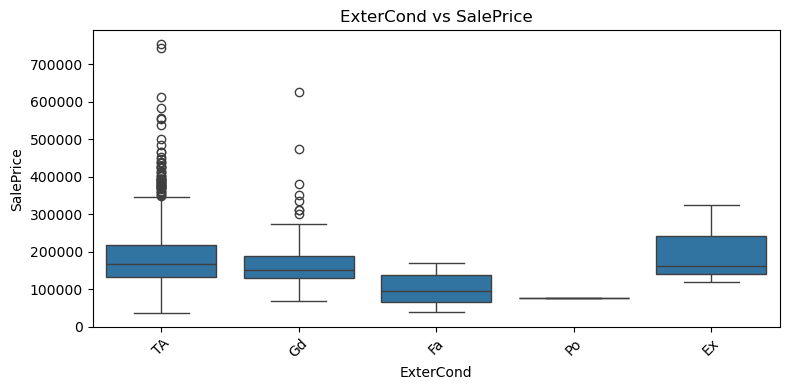

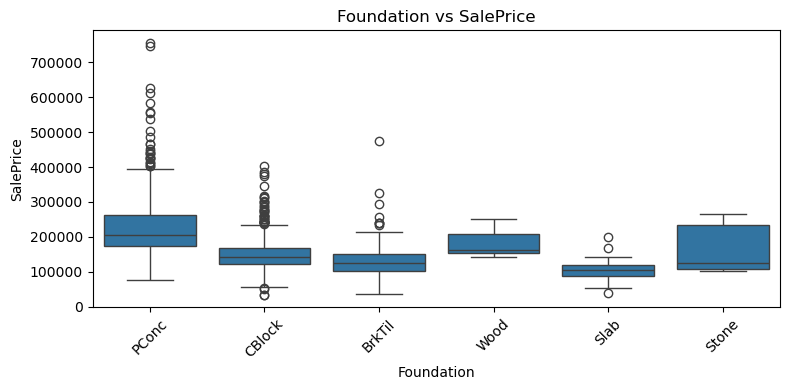

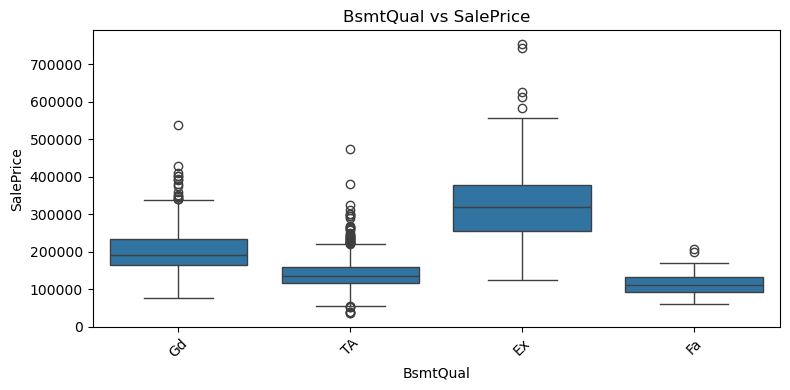

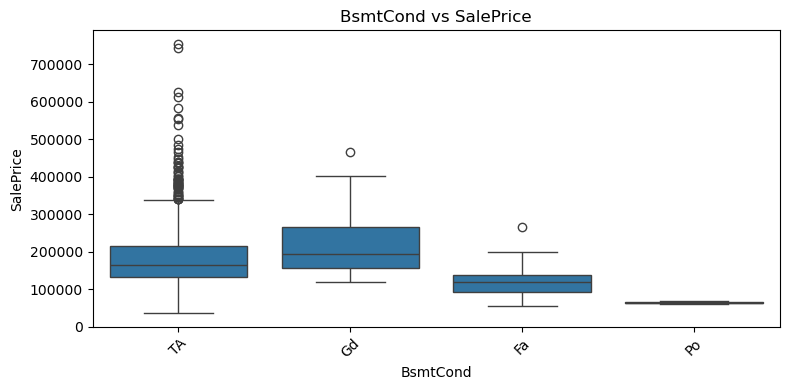

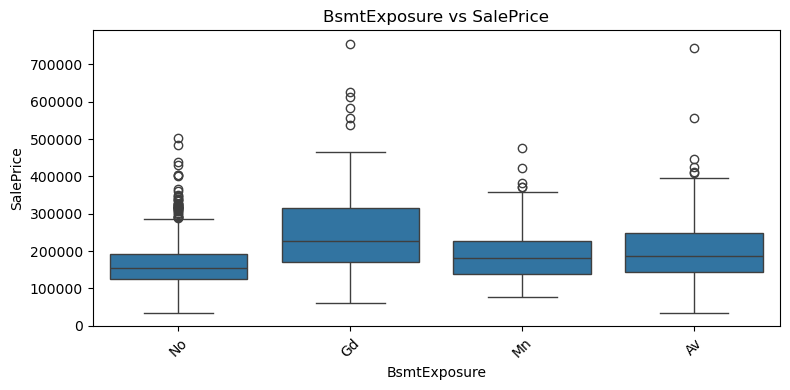

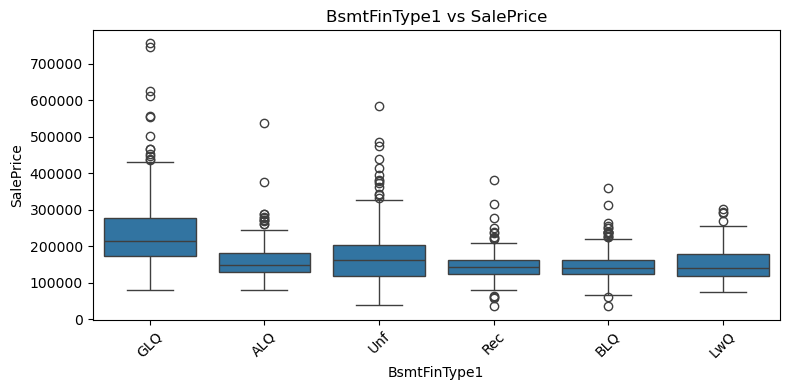

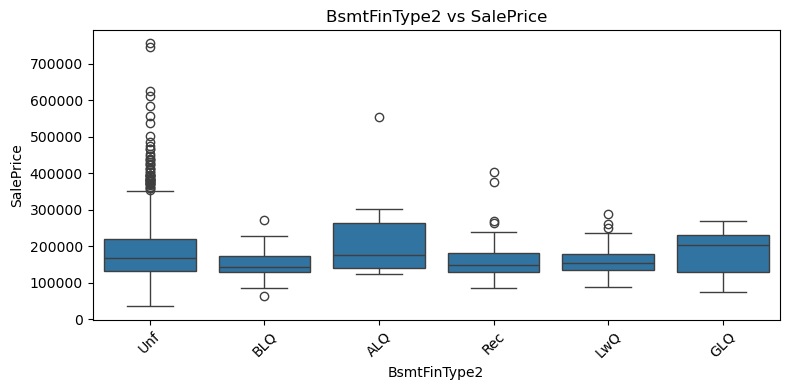

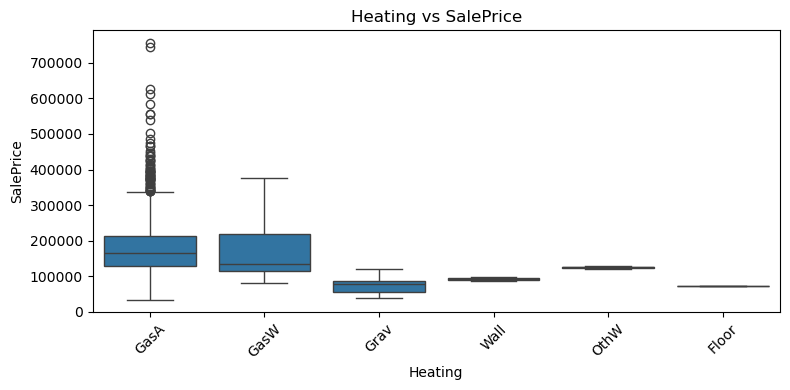

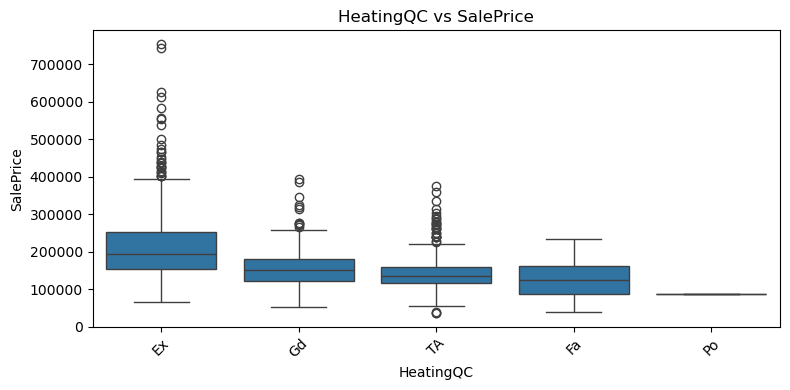

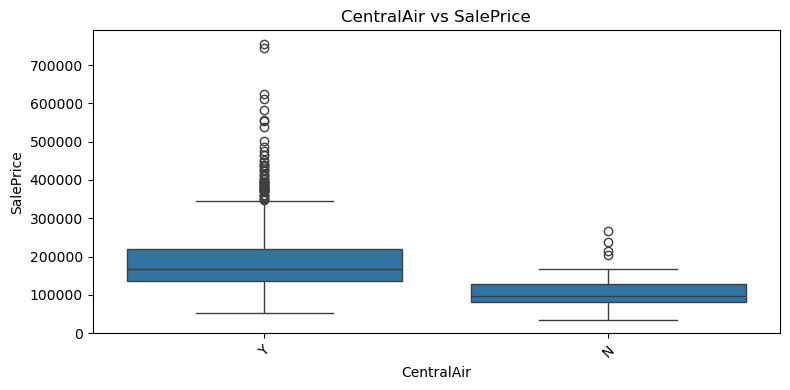

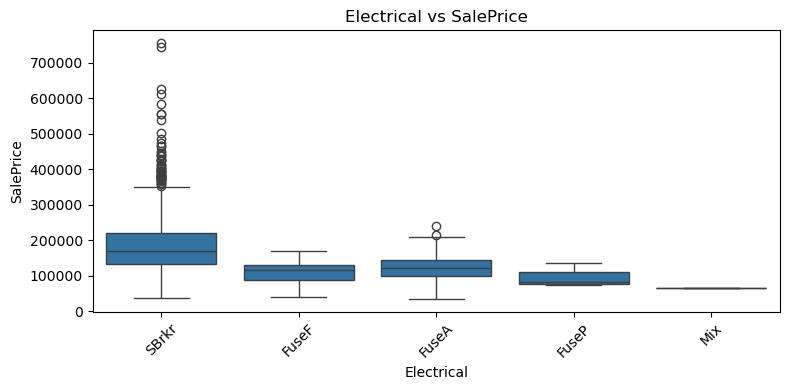

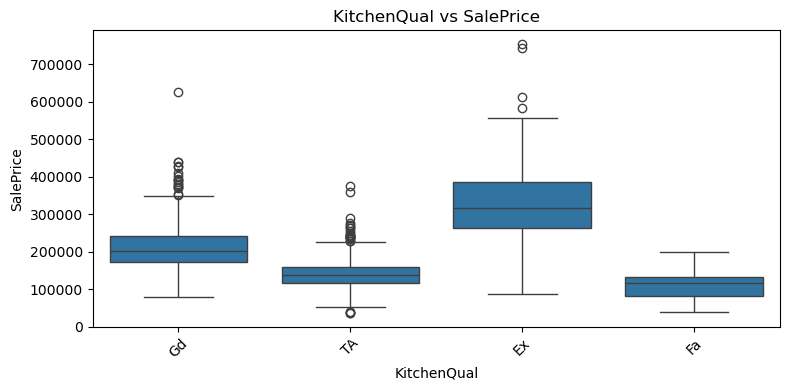

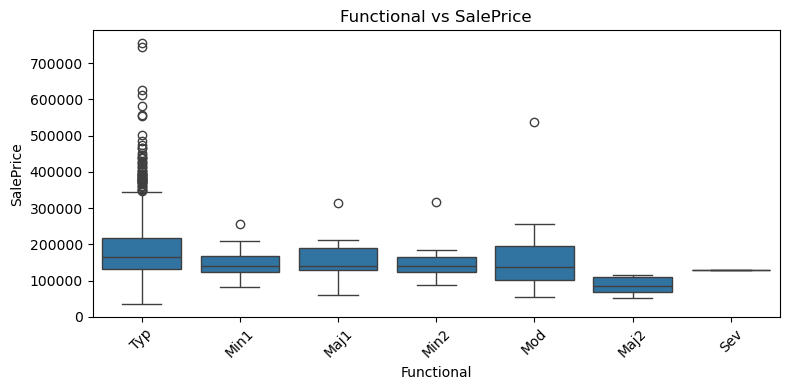

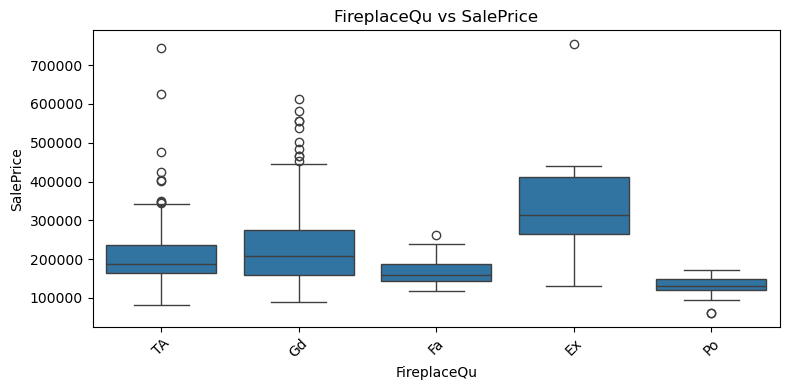

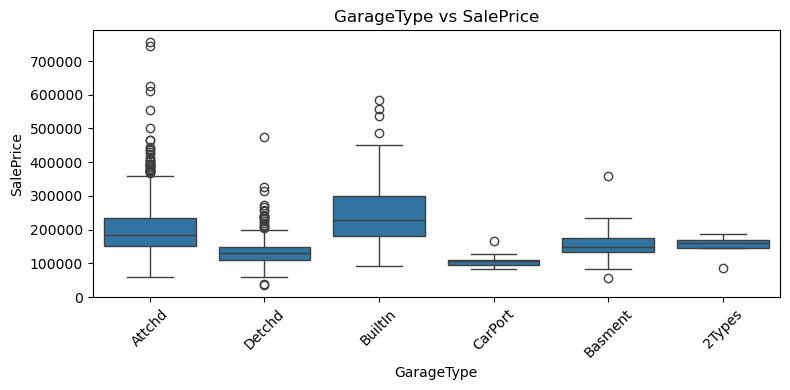

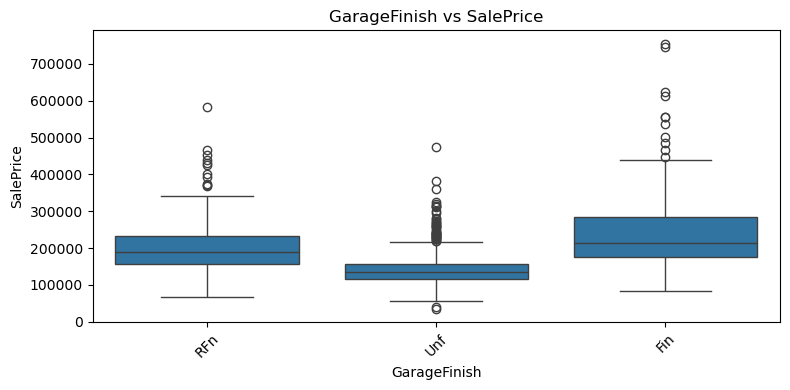

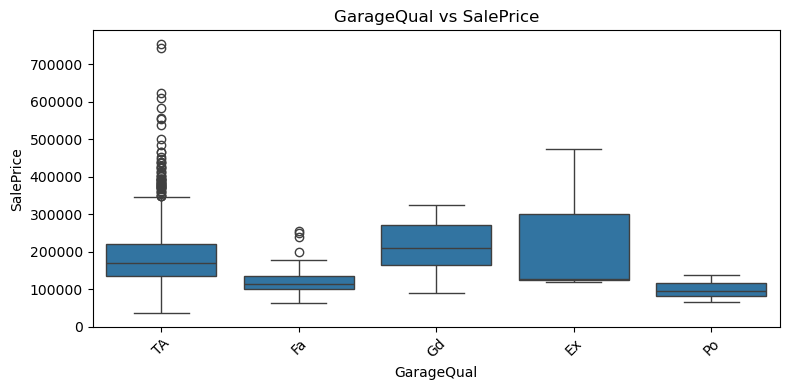

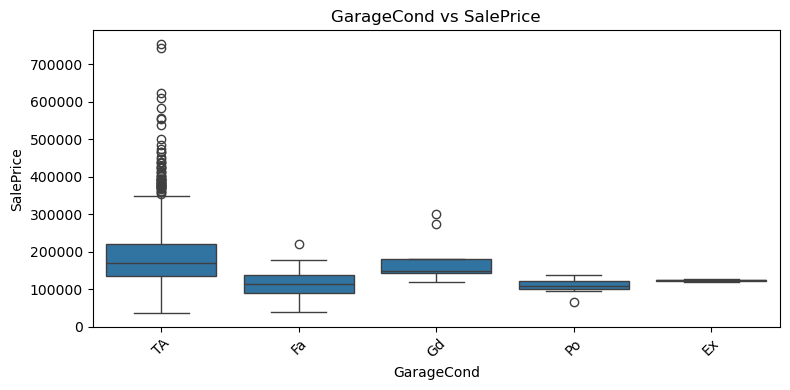

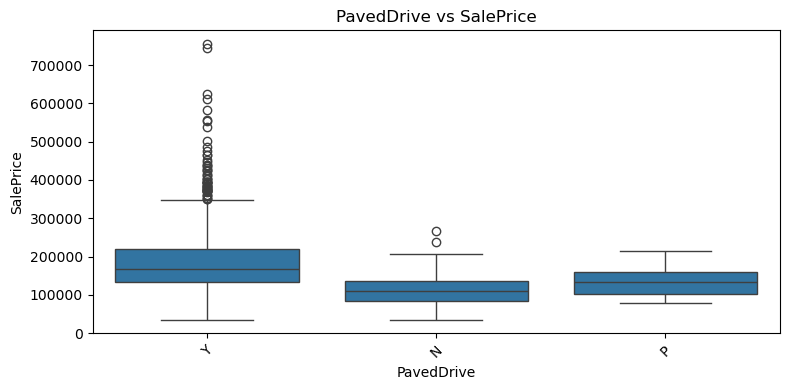

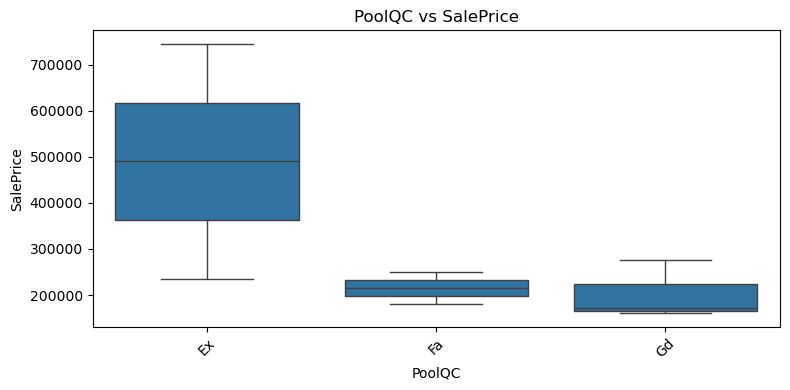

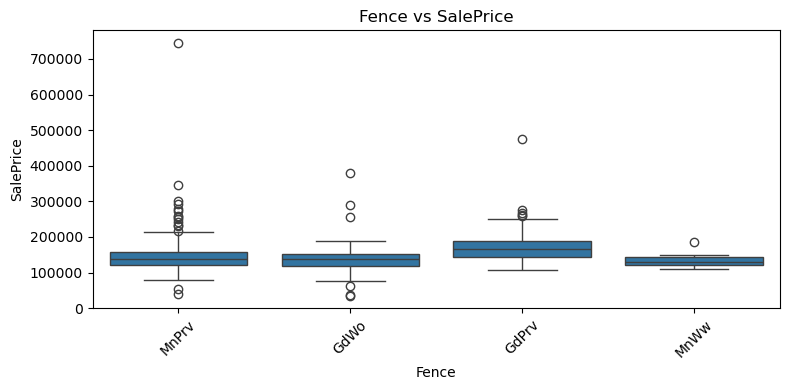

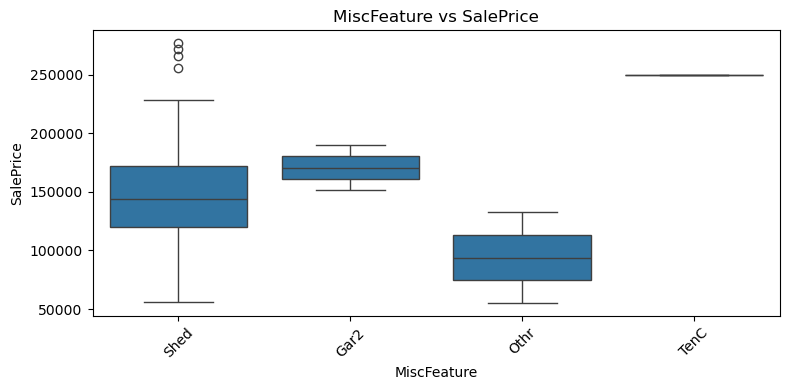

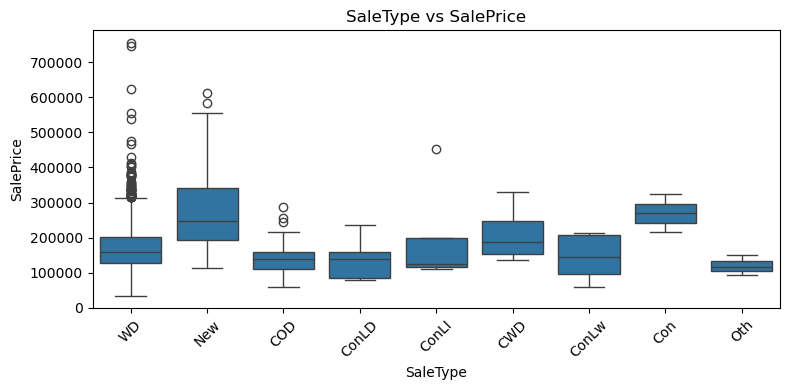

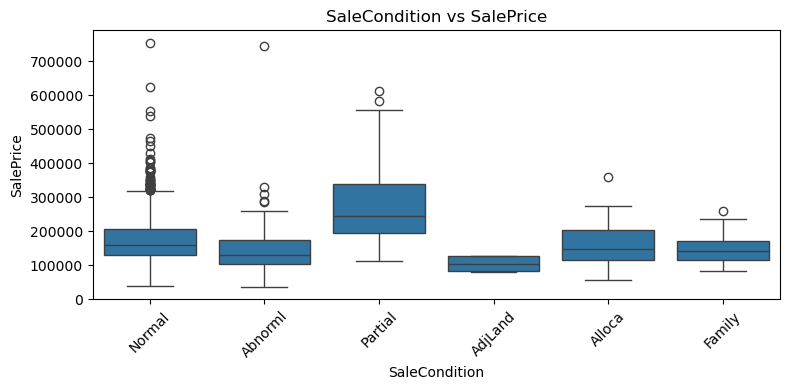

In [23]:
for col in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col], y=dataset['SalePrice'])
    plt.title(f"{col} vs {'SalePrice'}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [24]:
#Group features for preprocessing purpose
categorical_features = [feature for feature in dataset.columns if
                    dataset[feature].dtype == "object"] 

#from data set description
nominal_features = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                    "CentralAir", 'Electrical',"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

ordinal_features = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']



numerical_features = [feature for feature in dataset.columns if feature not in categorical_features + ['SalePrice']]

discrete_numerical_features = [ 'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold', "MSSubClass"] 

continuous_numerical_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
                                 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                 'MiscVal','YrSold']

#Just checking if any little feature left behind
assert categorical_features.sort() == (nominal_features + ordinal_features).sort()
assert numerical_features.sort() == (discrete_numerical_features + continuous_numerical_features).sort()

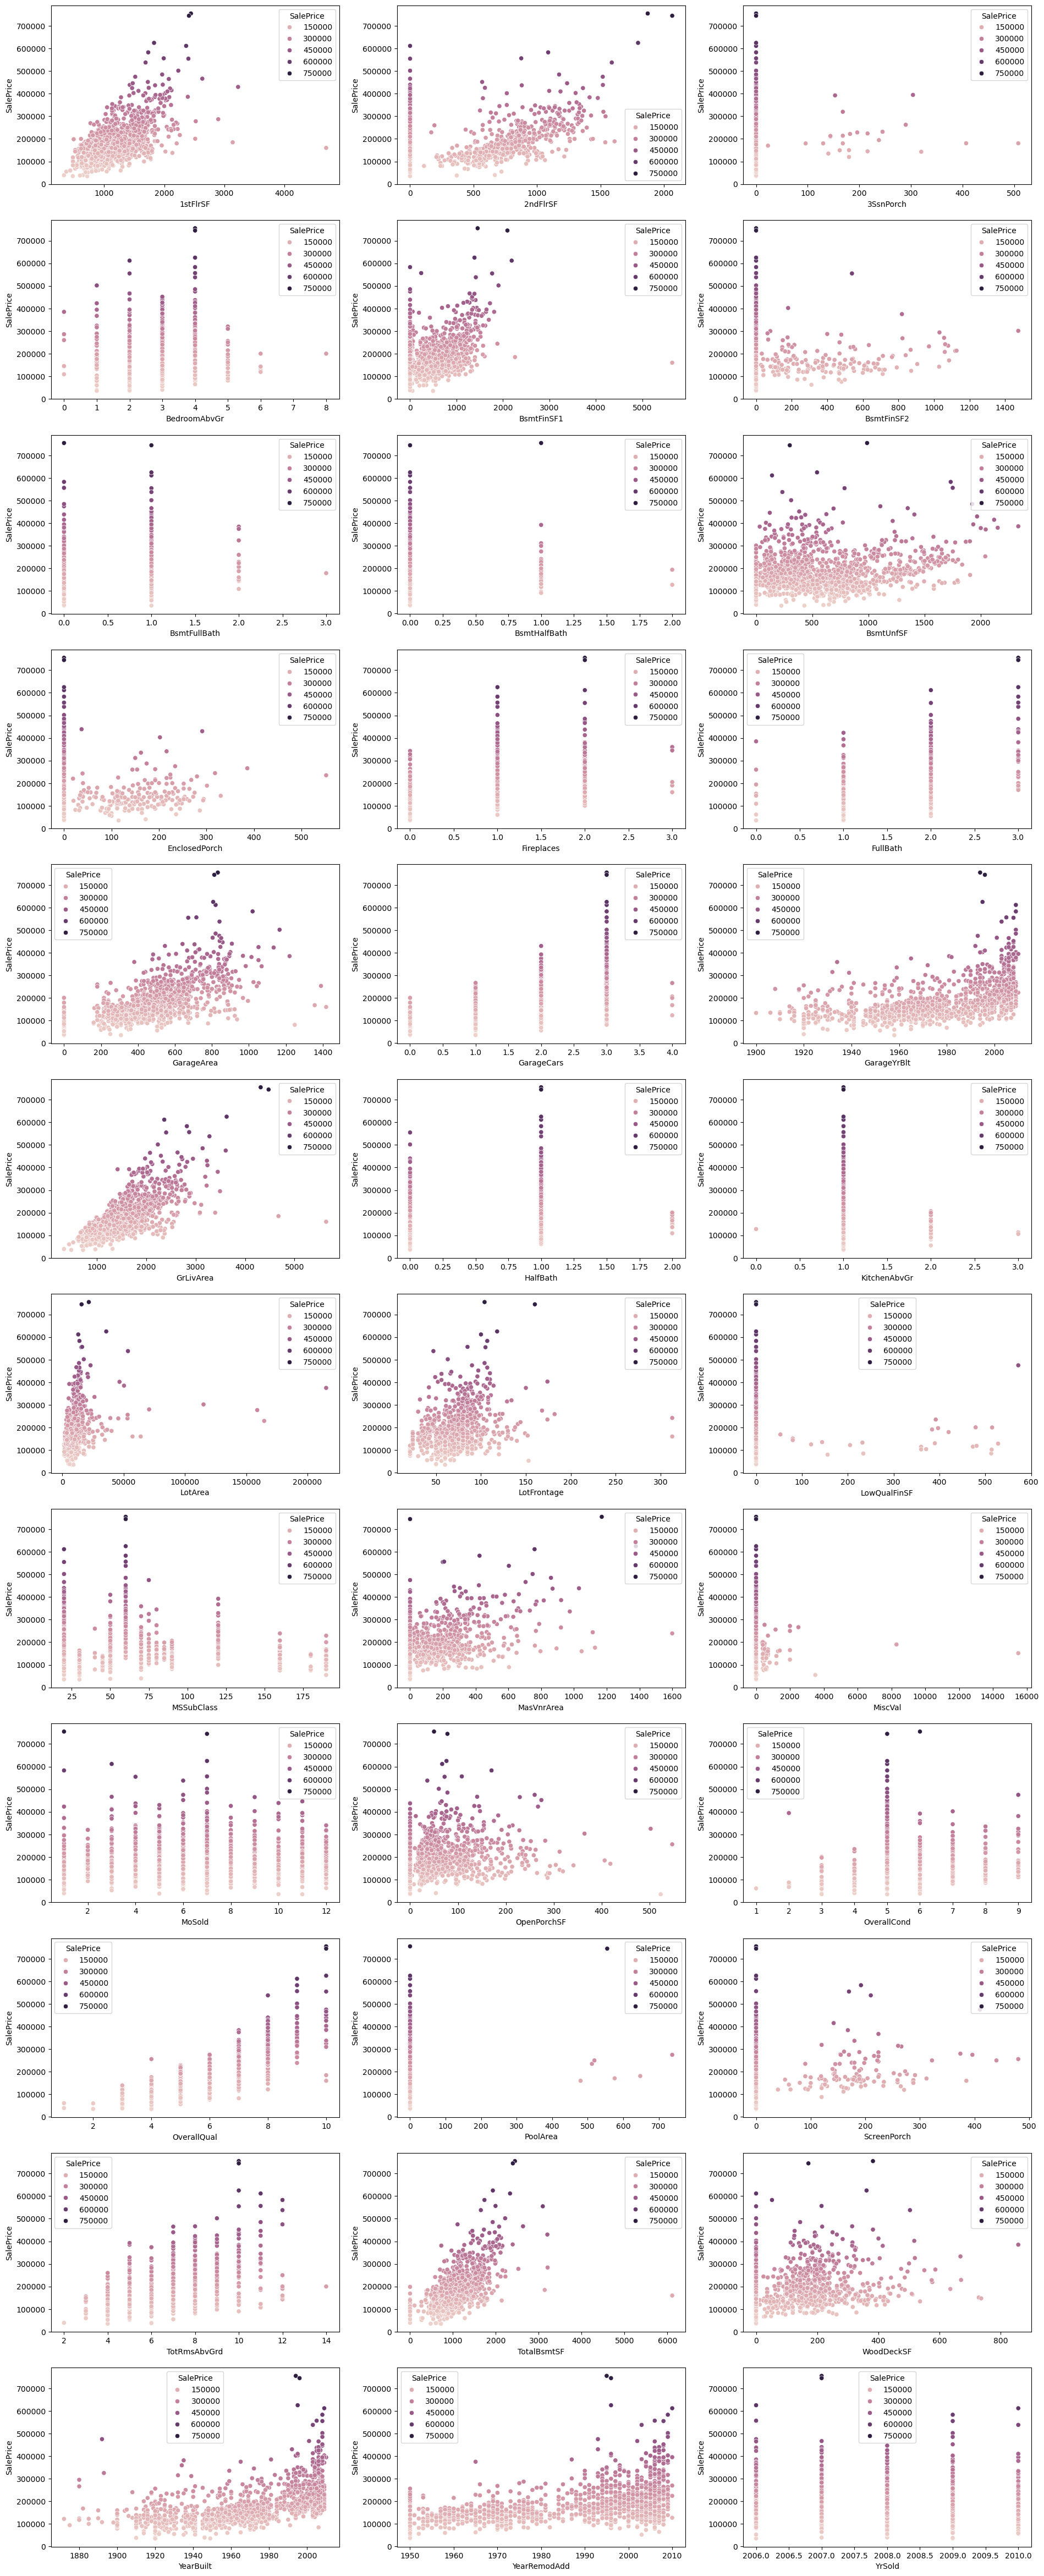

In [25]:
fig, ax = plt.subplots(12, 3, figsize=(23, 60))
for var, subplot in zip(numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice',  data=dataset, ax=subplot, hue = 'SalePrice' )
    

In [26]:
#
# Missing values 
#

missing = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
missing.columns = ["count"]
missing = missing.loc[(missing!=0).any(axis=1)]
missing["percent"] = missing[0:] / 1460
missing.style.background_gradient('viridis')

In [27]:
#
# Manage missing value 
#Solution 1 : replace by 0 missing numerical values and "string" missing categorical values
#

num_cols = dataset_copy.select_dtypes(include=["float64","int64"]).columns
cat_cols = dataset_copy.select_dtypes(include=["object"]).columns.tolist()

dataset_copy[num_cols] = dataset_copy[num_cols].fillna(0)
dataset_copy[cat_cols] = dataset_copy[cat_cols].fillna("Do_not_have_this_feature")

In [28]:
X=dataset_copy[dataset_numerical_features]
y= dataset_copy.SalePrice

In [29]:
#
#
#

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0,train_size = 0.8)
forest_model = RandomForestRegressor(n_estimators= 100,random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

18322.881236138288


In [30]:
# 2. Séparation des features/cible
y = dataset_copy['SalePrice']
X = dataset_copy.drop(columns=['SalePrice'])

# 3. Sélection des variables pertinentes
# Variables numériques corrélées avec la cible (à adapter selon ton analyse)
numerical_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd'
]

# Variables catégoriques pertinentes (à adapter selon ton dataset)
categorical_features = [
    'Neighborhood', 'KitchenQual', 'GarageFinish', 'BsmtQual',
    'ExterQual', 'HeatingQC'
]

# 4. Split train/valid
X = X[numerical_features + categorical_features]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0,train_size = 0.8)

# 5. Preprocessing
numerical_transformer = SimpleImputer(strategy='constant', fill_value=0)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Do_not_have_this_feature')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# 6. Pipeline Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=0))
])
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_valid)
rf_mae = mean_absolute_error(y_valid, rf_preds)
print(f"📊 MAE (Random Forest): {rf_mae:.0f}")

# 7. Pipeline XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=1000, learning_rate=0.1))
])
xgb_model.fit(X_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=[(X_valid, y_valid)],
    verbose=False)  # (facultatif : empêche l'affichage à chaque itération))
xgb_preds = xgb_model.predict(X_valid)
xgb_mae = mean_absolute_error(y_valid, xgb_preds)
print(f"📊 MAE (XGBoost): {xgb_mae:.0f}")

📊 MAE (Random Forest): 18819


ValueError: Pipeline.fit does not accept the early_stopping_rounds parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.

In [ ]:


# Supposons que la colonne cible s'appelle 'SalePrice'
y = dataset['SalePrice']
X = dataset.drop('SalePrice', axis=1)

# Séparer données train/validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=0)

# Identifier les colonnes numériques et catégoriques
numerical_cols = [cname for cname in X_train.columns if 
                  X_train[cname].dtype in ['int64', 'float64']]

categorical_cols = [cname for cname in X_train.columns if 
                    X_train[cname].dtype == "object" and 
                    X_train[cname].nunique() < 10]  # on limite ici pour éviter trop d'encodage

# ───────────────────────────────────────────────
# 2. Prétraitement
# ───────────────────────────────────────────────

# Remplir les valeurs manquantes
X_train[numerical_cols] = X_train[numerical_cols].fillna(0)
X_valid[numerical_cols] = X_valid[numerical_cols].fillna(0)

X_train[categorical_cols] = X_train[categorical_cols].fillna("Do_not_have_this_feature")
X_valid[categorical_cols] = X_valid[categorical_cols].fillna("Do_not_have_this_feature")

# One-hot encoding sur les colonnes catégoriques
OH_encoder = OneHotEncoder(handle_unknown='ignore')

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[categorical_cols]))

# Remettre les bons index
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Concaténer colonnes numériques et encodées
num_X_train = X_train[numerical_cols].reset_index(drop=True)
num_X_valid = X_valid[numerical_cols].reset_index(drop=True)

X_train_final = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid_final = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# ───────────────────────────────────────────────
# 3. Entraînement du modèle XGBoost avec early stopping
# ───────────────────────────────────────────────

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=0)

model.fit(
    X_train_final, y_train,
    early_stopping_rounds=10,
    eval_set=[(X_valid_final, y_valid)],
    verbose=False
)

# ───────────────────────────────────────────────
# 4. Évaluation
# ───────────────────────────────────────────────

preds = model.predict(X_valid_final)
mae = mean_absolute_error(y_valid, preds)

print(f"MAE avec XGBoost et early stopping : {mae:.2f}")
